## Setup and Data Loading

In [1]:
pip install pyspark



Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 316.9 MB 3.2 MB/s eta 0:00:011
     |████████████████████████████████| 200 kB 8.6 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425366 sha256=d6d7db064276c3a387c7350069b88395e278ecaa103fe687038fa75709897bec
  Stored in directory: /Users/ray/Library/Caches/pip/wheels/57/bd/14/ce9e21f2649298678d011fb8f71ed38ee70b42b94fef0be142
Successfully built pyspark
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [49]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 294 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 345 kB/s eta 0:00:01
     |████████████████████████████████| 7.5 MB 11.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 8.6 MB/s eta 0:00:01
     |████████████████████████████████| 242 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 12.8 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 5.3 MB/s eta 0:00:01
     |████████████████████████████████| 66 kB 8.8 MB/s eta 0:00:011
     |████████████████████████████████| 341 kB 11.1 MB/s eta 0:00:01
     |████████████████████████████████| 502 kB 5.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 14.0 MB 328 kB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Start with PySpark

In [304]:
from pyspark.sql import SparkSession

In [305]:
spark = SparkSession.builder.appName("objective_3").getOrCreate()

Read our accident data csv file

In [306]:
df = spark.read.csv("Road.csv", inferSchema=True, header=True)

In [307]:
print("Rows: ", df.count())
print("Columns: ", len(df.columns))

Rows:  12316
Columns:  32


See schema of data

In [308]:
df.printSchema()

root
 |-- Time: timestamp (nullable = true)
 |-- Day_of_week: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Sex_of_driver: string (nullable = true)
 |-- Educational_level: string (nullable = true)
 |-- Vehicle_driver_relation: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Type_of_vehicle: string (nullable = true)
 |-- Owner_of_vehicle: string (nullable = true)
 |-- Service_year_of_vehicle: string (nullable = true)
 |-- Defect_of_vehicle: string (nullable = true)
 |-- Area_accident_occured: string (nullable = true)
 |-- Lanes_or_Medians: string (nullable = true)
 |-- Road_allignment: string (nullable = true)
 |-- Types_of_Junction: string (nullable = true)
 |-- Road_surface_type: string (nullable = true)
 |-- Road_surface_conditions: string (nullable = true)
 |-- Light_conditions: string (nullable = true)
 |-- Weather_conditions: string (nullable = true)
 |-- Type_of_collision: string (nullable = true)
 |-- Number_of_ve

In [309]:
df.groupBy("Accident_severity").count().show()

+-----------------+-----+
|Accident_severity|count|
+-----------------+-----+
|   Serious Injury| 1743|
|    Slight Injury|10415|
|     Fatal injury|  158|
+-----------------+-----+



In [208]:
df.groupBy("Educational_level").count().show(truncate=False)

+------------------+-----+
|Educational_level |count|
+------------------+-----+
|Elementary school |2163 |
|Writing & reading |176  |
|Illiterate        |45   |
|NULL              |741  |
|Unknown           |100  |
|High school       |1110 |
|Above high school |362  |
|Junior high school|7619 |
+------------------+-----+



In [209]:
df.groupBy("Age_band_of_driver").count().show(truncate=False)

+------------------+-----+
|Age_band_of_driver|count|
+------------------+-----+
|Over 51           |1585 |
|Unknown           |1548 |
|Under 18          |825  |
|31-50             |4087 |
|18-30             |4271 |
+------------------+-----+



In [210]:
df.groupBy("Area_accident_occured").count().show(truncate=False)

+-------------------------------+-----+
|Area_accident_occured          |count|
+-------------------------------+-----+
| Hospital areas                |121  |
|NULL                           |239  |
|Unknown                        |22   |
|Recreational areas             |1    |
|Other                          |3819 |
|Rural village areas            |44   |
|Office areas                   |3451 |
|School areas                   |415  |
|Rural village areasOffice areas|20   |
|  Recreational areas           |327  |
|  Market areas                 |63   |
|Residential areas              |2060 |
| Church areas                  |1060 |
| Outside rural areas           |218  |
| Industrial areas              |456  |
+-------------------------------+-----+



In [211]:
df.groupBy("Cause_of_accident").count().show(truncate=False)

+------------------------------------+-----+
|Cause_of_accident                   |count|
+------------------------------------+-----+
|No distancing                       |2263 |
|Getting off the vehicle improperly  |197  |
|Overloading                         |59   |
|Improper parking                    |25   |
|Changing lane to the right          |1808 |
|Driving to the left                 |284  |
|Turnover                            |78   |
|Unknown                             |25   |
|Other                               |456  |
|Overspeed                           |61   |
|Overturning                         |149  |
|Driving at high speed               |174  |
|No priority to vehicle              |1207 |
|Driving under the influence of drugs|340  |
|Changing lane to the left           |1473 |
|Drunk driving                       |27   |
|Moving Backward                     |1137 |
|Driving carelessly                  |1402 |
|No priority to pedestrian           |721  |
|Overtakin

## Choosing Columns

- **Educational_level**: Educational level of driver.
- **Age_band_of_driver**: Age band of driver.
- **Driving_experience**: Driver's experience.
- **Accident_severity**: Severity of accident.
- **Cause_of_accident**: Cause of accident
- **Area_accident_occured**: Area where accident happened.

In [310]:
selected_columns = ['Area_accident_occured','Educational_level', 'Age_band_of_driver','Driving_experience','Accident_severity',"Cause_of_accident"]
df = df.select(selected_columns)


In [311]:
df = df.na.drop() # drop the Nulls

In [312]:
df.describe().show()

+-------+---------------------+-----------------+------------------+------------------+-----------------+--------------------+
|summary|Area_accident_occured|Educational_level|Age_band_of_driver|Driving_experience|Accident_severity|   Cause_of_accident|
+-------+---------------------+-----------------+------------------+------------------+-----------------+--------------------+
|  count|                11095|            11095|             11095|             11095|            11095|               11095|
|   mean|                 NULL|             NULL|              NULL|              NULL|             NULL|                NULL|
| stddev|                 NULL|             NULL|              NULL|              NULL|             NULL|                NULL|
|    min|         Market areas|Above high school|             18-30|             1-2yr|     Fatal injury|Changing lane to ...|
|    max|              Unknown|Writing & reading|           Unknown|           unknown|    Slight Injury|      

In [272]:
from pyspark.sql.functions import when

Encode accident severity as an integer

In [313]:
df_severity_as_integer = df.withColumn(
    'accident_severity_integer',
    when(df['Accident_severity'] == 'Slight Injury', 1.0)
    .when(df['Accident_severity'] == 'Serious Injury', 2.0)
    .when(df['Accident_severity'] == 'Fatal injury', 3.0)
)

In [314]:
df_severity_as_integer.select("accident_severity_integer").describe().show()

+-------+-------------------------+
|summary|accident_severity_integer|
+-------+-------------------------+
|  count|                    11095|
|   mean|       1.1659305993690852|
| stddev|       0.4043126275417968|
|    min|                      1.0|
|    max|                      3.0|
+-------+-------------------------+



### Converting strings into numerical format (using StringIndexer and OneHotEncoder).

In [315]:
df.printSchema()

root
 |-- Area_accident_occured: string (nullable = true)
 |-- Educational_level: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Accident_severity: string (nullable = true)
 |-- Cause_of_accident: string (nullable = true)



Convert all of our feature columns into integers

In [316]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

indexer = StringIndexer(inputCol="Educational_level", outputCol="Educational_level"+"_index")
indexed = indexer.fit(df_severity_as_integer).transform(df_severity_as_integer)

indexer = StringIndexer(inputCol="Age_band_of_driver", outputCol="Age_band_of_driver"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Driving_experience", outputCol="Driving_experience"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Cause_of_accident", outputCol="Cause_of_accident"+"_index")
indexed = indexer.fit(indexed).transform(indexed)

indexer = StringIndexer(inputCol="Area_accident_occured", outputCol="Area_accident_occured"+"_index")
indexed = indexer.fit(indexed).transform(indexed)



#'Educational_level', 'Age_band_of_driver','Driving_experience','Accident_severity', 'Cause_of_accident'


In [317]:
indexed.show()

+---------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------------+-----------------------+------------------------+------------------------+-----------------------+---------------------------+
|Area_accident_occured| Educational_level|Age_band_of_driver|Driving_experience|Accident_severity|   Cause_of_accident|accident_severity_integer|Educational_level_index|Age_band_of_driver_index|Driving_experience_index|Cause_of_accident_index|Area_accident_occured_index|
+---------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------------+-----------------------+------------------------+------------------------+-----------------------+---------------------------+
|    Residential areas| Above high school|             18-30|             1-2yr|    Slight Injury|     Moving Backward|                      1.0|                    3.0|               

In [318]:
indexed.printSchema()

root
 |-- Area_accident_occured: string (nullable = true)
 |-- Educational_level: string (nullable = true)
 |-- Age_band_of_driver: string (nullable = true)
 |-- Driving_experience: string (nullable = true)
 |-- Accident_severity: string (nullable = true)
 |-- Cause_of_accident: string (nullable = true)
 |-- accident_severity_integer: double (nullable = true)
 |-- Educational_level_index: double (nullable = false)
 |-- Age_band_of_driver_index: double (nullable = false)
 |-- Driving_experience_index: double (nullable = false)
 |-- Cause_of_accident_index: double (nullable = false)
 |-- Area_accident_occured_index: double (nullable = false)



Assemble features

In [320]:
assembler = VectorAssembler(inputCols=["Area_accident_occured_index","Educational_level_index", "Age_band_of_driver_index",
                                       "Driving_experience_index", "Cause_of_accident_index"
                                       ], outputCol="features")

In [321]:
assembler

VectorAssembler_8bc55c780679

In [322]:
output = assembler.transform(indexed)
output.show()

+---------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------------+-----------------------+------------------------+------------------------+-----------------------+---------------------------+--------------------+
|Area_accident_occured| Educational_level|Age_band_of_driver|Driving_experience|Accident_severity|   Cause_of_accident|accident_severity_integer|Educational_level_index|Age_band_of_driver_index|Driving_experience_index|Cause_of_accident_index|Area_accident_occured_index|            features|
+---------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------------+-----------------------+------------------------+------------------------+-----------------------+---------------------------+--------------------+
|    Residential areas| Above high school|             18-30|             1-2yr|    Slight Injury|     Moving Backward|  

See set of features, and corresponding accident severity

In [323]:
output.select("features", "Accident_severity").show(truncate=False)

+----------------------+-----------------+
|features              |Accident_severity|
+----------------------+-----------------+
|[2.0,3.0,0.0,3.0,5.0] |Slight Injury    |
|[1.0,0.0,1.0,2.0,8.0] |Slight Injury    |
|[6.0,0.0,0.0,3.0,2.0] |Serious Injury   |
|(5,[0,4],[1.0,1.0])   |Slight Injury    |
|[4.0,0.0,0.0,1.0,8.0] |Slight Injury    |
|[2.0,0.0,0.0,1.0,7.0] |Slight Injury    |
|[2.0,0.0,0.0,1.0,4.0] |Slight Injury    |
|[4.0,0.0,0.0,2.0,1.0] |Slight Injury    |
|[2.0,0.0,0.0,3.0,5.0] |Serious Injury   |
|[2.0,3.0,0.0,3.0,2.0] |Serious Injury   |
|[1.0,3.0,1.0,5.0,6.0] |Serious Injury   |
|(5,[0,3],[1.0,3.0])   |Slight Injury    |
|[1.0,0.0,1.0,0.0,4.0] |Slight Injury    |
|[1.0,0.0,1.0,2.0,0.0] |Serious Injury   |
|(5,[0,3],[1.0,2.0])   |Serious Injury   |
|(5,[0,4],[1.0,5.0])   |Slight Injury    |
|[1.0,1.0,0.0,1.0,1.0] |Serious Injury   |
|[2.0,0.0,0.0,1.0,6.0] |Slight Injury    |
|[2.0,0.0,0.0,4.0,5.0] |Serious Injury   |
|[0.0,0.0,4.0,1.0,11.0]|Slight Injury    |
+----------

Statistics for features and accident severity

In [324]:
model_df = output.select("features", "accident_severity_integer")
model_df.describe().show()

+-------+-------------------------+
|summary|accident_severity_integer|
+-------+-------------------------+
|  count|                    11095|
|   mean|       1.1659305993690852|
| stddev|       0.4043126275417968|
|    min|                      1.0|
|    max|                      3.0|
+-------+-------------------------+



In [325]:
unique_values_count = model_df.groupBy("accident_severity_integer").count()
unique_values_count.show()

+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 9393|
|                      3.0|  139|
|                      2.0| 1563|
+-------------------------+-----+



In [326]:
model_df.show()


+--------------------+-------------------------+
|            features|accident_severity_integer|
+--------------------+-------------------------+
|[2.0,3.0,0.0,3.0,...|                      1.0|
|[1.0,0.0,1.0,2.0,...|                      1.0|
|[6.0,0.0,0.0,3.0,...|                      2.0|
| (5,[0,4],[1.0,1.0])|                      1.0|
|[4.0,0.0,0.0,1.0,...|                      1.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|[2.0,0.0,0.0,1.0,...|                      1.0|
|[4.0,0.0,0.0,2.0,...|                      1.0|
|[2.0,0.0,0.0,3.0,...|                      2.0|
|[2.0,3.0,0.0,3.0,...|                      2.0|
|[1.0,3.0,1.0,5.0,...|                      2.0|
| (5,[0,3],[1.0,3.0])|                      1.0|
|[1.0,0.0,1.0,0.0,...|                      1.0|
|[1.0,0.0,1.0,2.0,...|                      2.0|
| (5,[0,3],[1.0,2.0])|                      2.0|
| (5,[0,4],[1.0,5.0])|                      1.0|
|[1.0,1.0,0.0,1.0,...|                      2.0|
|[2.0,0.0,0.0,1.0,..

Add weights to accident severity integer

In [327]:
from pyspark.sql.functions import udf
from pyspark.sql.types import DoubleType

In [328]:
total_count = model_df.count()
class_counts = model_df.groupBy("accident_severity_integer").count().collect()
weights = {row['accident_severity_integer']: total_count / float(row['count']) for row in class_counts}


In [329]:
def get_weight(class_label):
    return weights[class_label]

udf_get_weight = udf(get_weight, DoubleType())

Apply weights, split data into training and test, and set up logistic regression

In [330]:
from pyspark.ml.classification import LogisticRegression
weighted_model_df = model_df.withColumn('classWeight', udf_get_weight('accident_severity_integer'))
training_df, test_df = weighted_model_df.randomSplit([0.7, 0.3])
log_reg = LogisticRegression(labelCol="accident_severity_integer", weightCol="classWeight", family="multinomial").fit(training_df)

In [331]:
test_df.groupBy("accident_severity_integer").count().show()
training_df.groupBy("accident_severity_integer").count().show()


+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 2789|
|                      3.0|   45|
|                      2.0|  427|
+-------------------------+-----+

+-------------------------+-----+
|accident_severity_integer|count|
+-------------------------+-----+
|                      1.0| 6604|
|                      3.0|   94|
|                      2.0| 1136|
+-------------------------+-----+



In [332]:
print("Training dataset samples: ", training_df.count())
print("Test dataset samples: ", test_df.count())

Training dataset samples:  7834
Test dataset samples:  3261


Run logistic regression

In [333]:
log_reg

LogisticRegressionModel: uid=LogisticRegression_ed58a5893932, numClasses=4, numFeatures=5

Get training results

In [334]:
training_results = log_reg.evaluate(training_df).predictions

In [335]:
training_results.describe().show()

+-------+-------------------------+------------------+------------------+
|summary|accident_severity_integer|       classWeight|        prediction|
+-------+-------------------------+------------------+------------------+
|  count|                     7834|              7834|              7834|
|   mean|       1.1690068930303803| 2.982851482310135|2.1303293336737297|
| stddev|       0.4055397812633533|  8.72031542370956|0.7604696075726908|
|    min|                      1.0|1.1811987650377942|               1.0|
|    max|                      3.0| 79.82014388489209|               3.0|
+-------+-------------------------+------------------+------------------+



Get test results

In [336]:
results = log_reg.evaluate(test_df).predictions

In [337]:
results.describe().show()

+-------+-------------------------+------------------+------------------+
|summary|accident_severity_integer|       classWeight|        prediction|
+-------+-------------------------+------------------+------------------+
|  count|                     3261|              3261|              3261|
|   mean|       1.1585403250536646| 3.041196408335081|2.1557804354492487|
| stddev|      0.40131480687478954| 9.299933285454046|0.7595735683686939|
|    min|                      1.0|1.1811987650377942|               1.0|
|    max|                      3.0| 79.82014388489209|               3.0|
+-------+-------------------------+------------------+------------------+



In [338]:
results.select(["accident_severity_integer", "prediction"]).show(10)

+-------------------------+----------+
|accident_severity_integer|prediction|
+-------------------------+----------+
|                      1.0|       3.0|
|                      1.0|       3.0|
|                      1.0|       3.0|
|                      1.0|       3.0|
|                      2.0|       3.0|
|                      2.0|       3.0|
|                      2.0|       3.0|
|                      1.0|       3.0|
|                      1.0|       3.0|
|                      1.0|       3.0|
+-------------------------+----------+
only showing top 10 rows



In [339]:
results.describe().show()

+-------+-------------------------+------------------+------------------+
|summary|accident_severity_integer|       classWeight|        prediction|
+-------+-------------------------+------------------+------------------+
|  count|                     3261|              3261|              3261|
|   mean|       1.1585403250536646| 3.041196408335081|2.1557804354492487|
| stddev|      0.40131480687478954| 9.299933285454046|0.7595735683686939|
|    min|                      1.0|1.1811987650377942|               1.0|
|    max|                      3.0| 79.82014388489209|               3.0|
+-------+-------------------------+------------------+------------------+



Calculate true positives, false positives, false negatives

In [340]:
# For class 1.0
tp_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction == 1.0)].count()
tn_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction != 1.0)].count()
fp_1 = results[(results.accident_severity_integer != 1.0) & (results.prediction == 1.0)].count()
fn_1 = results[(results.accident_severity_integer == 1.0) & (results.prediction != 1.0)].count()

# For class 2.0
tp_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction == 2.0)].count()
tn_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction != 2.0)].count()
fp_2 = results[(results.accident_severity_integer != 2.0) & (results.prediction == 2.0)].count()
fn_2 = results[(results.accident_severity_integer == 2.0) & (results.prediction != 2.0)].count()

# For class 0.0
tp_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction == 0.0)].count()
tn_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction != 0.0)].count()
fp_0 = results[(results.accident_severity_integer != 0.0) & (results.prediction == 0.0)].count()
fn_0 = results[(results.accident_severity_integer == 0.0) & (results.prediction != 0.0)].count()


In [341]:
total_tp = tp_1 + tp_2 + tp_0
total_fp = fp_1 + fp_2 + fp_0
total_fn = fn_1 + fn_2 + fn_0
total_tn = tn_0 + tn_1 + tn_2

Calculate accuracy

In [352]:
total_observations = results.count()
accuracy = (float(total_tp) + float(total_tn))/ (total_tp+ total_fp + total_fn + total_tn)# Overall accuracy

print("Accuracy: ", accuracy)

Accuracy:  0.6292548298068077


Calculate recall and precision

In [353]:
recall_micro = total_tp / (total_tp + total_fn) if (total_tp + total_fn) > 0 else 0

precision = (total_tp) / (total_tp + total_fp) if (total_tp + total_fp) > 0 else 0
recall = float(total_tn) / (total_tp+total_tn)
f1 = (2 * precision * recall)/(precision + recall)
print("recall: ", recall)
print("precision: ", precision)
print("f1 score: ", f1)

recall:  0.8687459389213775
precision:  0.3986186482486433
f1 score:  0.5464857316513941


Create Confusion Matrix

/Users/ray/Library/Python/3.9/lib/python/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


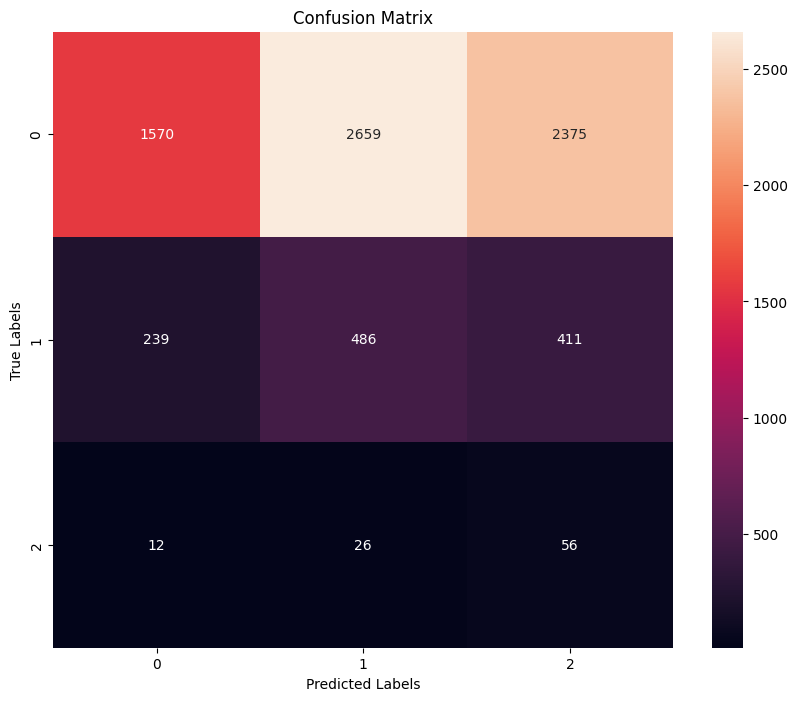

In [344]:
from pyspark.mllib.evaluation import MulticlassMetrics
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Convert predictions to RDD
predictionAndLabels = training_results.select("prediction", "accident_severity_integer").rdd

# Step 2: Initialize MulticlassMetrics with the RDD
metrics = MulticlassMetrics(predictionAndLabels)

# Step 3: Get the confusion matrix
confusion_matrix = metrics.confusionMatrix().toArray()

# Step 4: Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Upcoming code is for decision tree model

In [46]:
# Decision Tree

In [251]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

Train decision tree

In [252]:
dt_df_classifier = DecisionTreeClassifier(labelCol="accident_severity_integer").fit(training_df)

In [253]:
dt_df_predictions = dt_df_classifier.transform(test_df)

show predictions

In [254]:
dt_df_predictions.show()

+-------------+-------------------------+------------------+--------------------+--------------------+----------+
|     features|accident_severity_integer|       classWeight|       rawPrediction|         probability|prediction|
+-------------+-------------------------+------------------+--------------------+--------------------+----------+
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.8645893441...|       1.0|
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.8645893441...|       1.0|
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.8645893441...|       1.0|
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.8645893441...|       1.0|
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.8645893441...|       1.0|
|    (5,[],[])|                      1.0|1.1811987650377942|[0.0,4495.0,649.0...|[0.0,0.

In [255]:
dt_df_accuracy = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="accuracy").evaluate(dt_df_predictions)

In [256]:
print("Accuracy: ", dt_df_accuracy)

Accuracy:  0.8425981873111782


In [349]:
dt_df_precision = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="weightedPrecision").evaluate(dt_df_predictions)

dt_df_recall = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="weightedRecall").evaluate(dt_df_predictions)
dt_df_f1 = MulticlassClassificationEvaluator(labelCol="accident_severity_integer",
                                                   metricName="f1").evaluate(dt_df_predictions)

In [350]:
print("Precision: ", dt_df_precision)
print("Recall:", recall)
print("F1 Score: ", dt_df_f1)

Precision:  0.7382641254740633
Recall: 0.8687459389213775
F1 Score:  0.7761555231655493


In [259]:
df.columns

['Area_accident_occured',
 'Educational_level',
 'Age_band_of_driver',
 'Driving_experience',
 'Accident_severity',
 'Cause_of_accident']

In [260]:
dt_df_classifier.featureImportances

SparseVector(5, {0: 0.3557, 1: 0.0593, 2: 0.162, 3: 0.0646, 4: 0.3584})